In [ ]:
Используйте датасет PRSA_Data_Dingling_20130301-20170228.csv по ссылке. 


Объедините прогнозы, полученные с помощью моделей ARIMA, SARIMA и Prophet, чтобы повысить точность предсказаний.

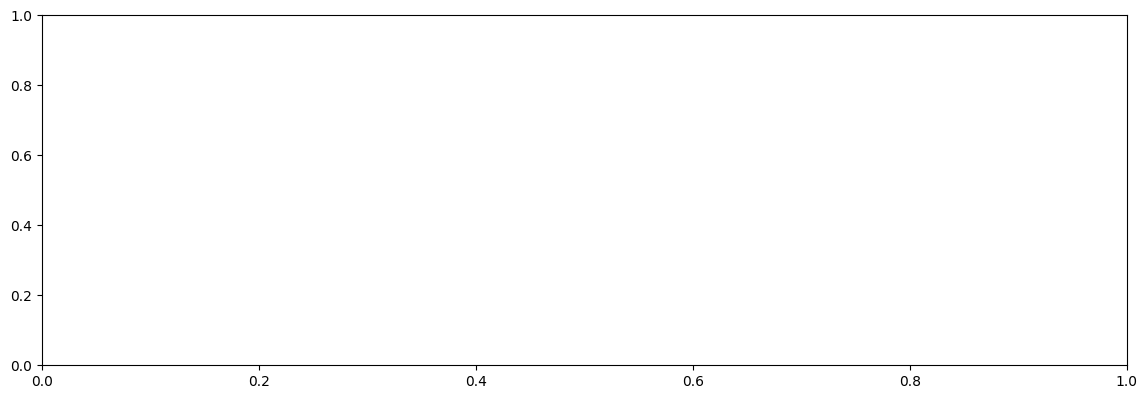

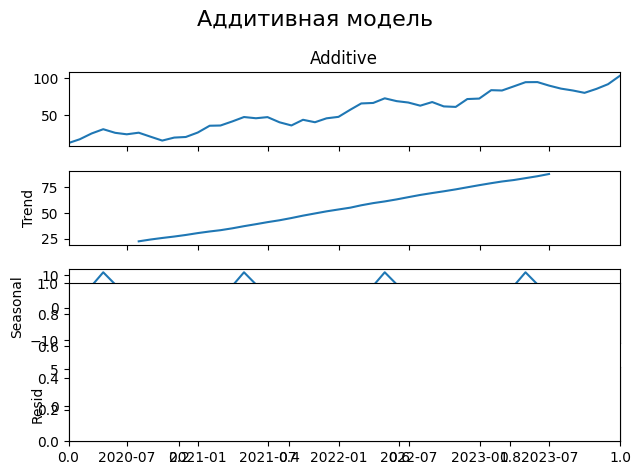

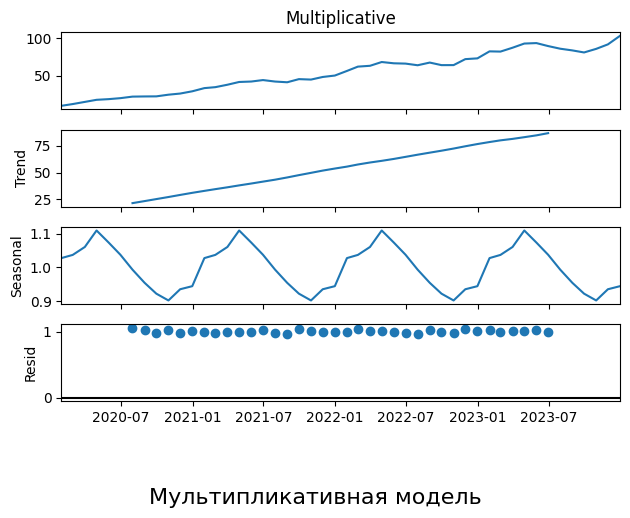

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Генерируем искусственные данные
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=48, freq='ME')
trend = np.linspace(10, 100, 48)
seasonality = 10 * np.sin(np.linspace(0, 8 * np.pi, 48))  # волнообразная сезонность
noise = np.random.normal(0, 3, 48)

# Аддитивный временной ряд
y_add = trend + seasonality + noise

# Мультипликативный временной ряд
y_mul = trend * (1 + 0.1 * np.sin(np.linspace(0, 8 * np.pi, 48))) * (1 + noise / 100)

# Создание DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Additive': y_add,
    'Multiplicative': y_mul
})
df.set_index('Date', inplace=True)

# Декомпозиция (аддитивная модель)
decomp_add = seasonal_decompose(df['Additive'], model='additive', period=12)

# Декомпозиция (мультипликативная модель)
decomp_mul = seasonal_decompose(df['Multiplicative'], model='multiplicative', period=12)

# Визуализация
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
decomp_add.plot()
plt.suptitle('Аддитивная модель', fontsize=16)
plt.tight_layout()

plt.subplot(2, 1, 2)
decomp_mul.plot()
plt.suptitle('Мультипликативная модель', fontsize=16, y=-0.1)
plt.tight_layout()

plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Загрузим примерный временной ряд (можешь подставить свой!)
df = pd.read_csv("your_data.csv", parse_dates=['date'], index_col='date')
df = df.asfreq('M')  # Приводим к ежемесячной частоте

# Декомпозиция
result = seasonal_decompose(df['sales'], model='multiplicative', period=12)

# Теперь можем получить только тренд:
trend = result.trend

# И график:
plt.figure(figsize=(10, 4))
plt.plot(df['sales'], label='Исходные данные')
plt.plot(trend, label='Тренд без сезонности', linewidth=3)
plt.legend()
plt.title('Удаление сезонности для анализа реального тренда')
plt.grid(True)
plt.show()